In [ ]:
print("This project is to convert loe resolution image to high resolution image")

This project is to convert loe resolution image to high resolution image


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2 as cv
import requests
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


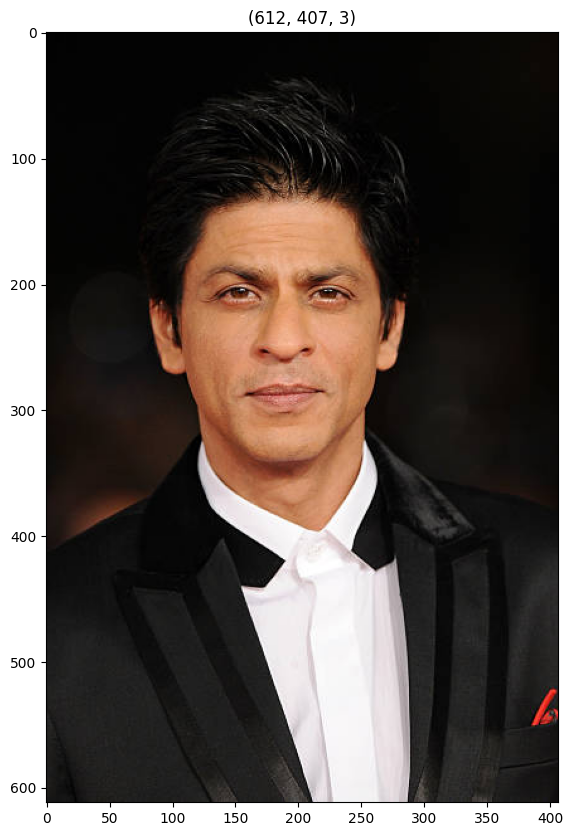

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/gad/shah.jpg"

image=cv.imread(path)
plot=cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title(plot.shape)
plt.imshow(plot)
plt.show()

In [ ]:
def preprocessing(path):
  size=(tf.convert_to_tensor(plot.shape[:-1])//4)*4
  image_crop=tf.image.crop_to_bounding_box(path,0,0,size[0],size[1])
  processed_image=tf.cast(image_crop,tf.float32)
  return tf.expand_dims(processed_image,0)

In [ ]:
esrgn="https://tfhub.dev/captain-pool/esrgan-tf2/1"
model=hub.load(esrgn)

In [ ]:
def srmodel(path):
  processed_image=preprocessing(path)
  new_img=model(processed_image)

  return tf.squeeze(new_img)/255.0

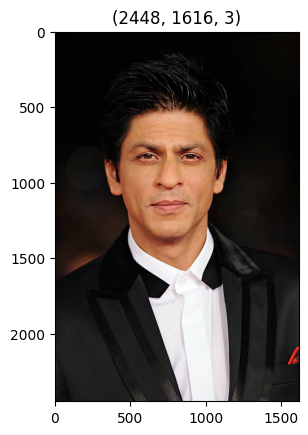

In [ ]:
high_res=srmodel(plot)
plt.title(high_res.shape)
plt.imshow(high_res)
plt.show()

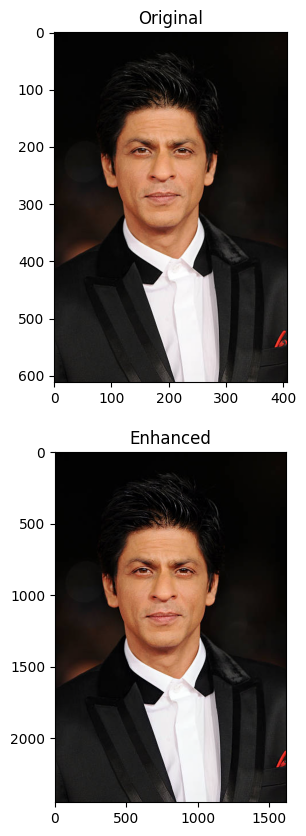

In [ ]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(2,1,1)
plt.title("Original")
plt.imshow(plot)

fig.add_subplot(2,1,2)
plt.title("Enhanced")
plt.imshow(high_res)